In [3]:
!pip install numpy
!pip install pandas
!pip install seaborn 
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:001.6 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [2]:
A = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])
B = np.array([
    [1, 2, 3, 4],
    [8, 7, 6, 5],
    [9, 10, 11, 12],
    [16, 15, 14, 13],
    [17, 18, 19, 20],
    [24, 23, 22, 21]
])
C = np.random.randint(2, 11, (4, 3))
D = np.identity(4)

S = np.vstack([np.hstack([A, B]), np.hstack([C, D])])

F = np.zeros((10, 2))

G = np.hstack([S, F])

G

array([[ 1.,  0.,  1.,  1.,  2.,  3.,  4.,  0.,  0.],
       [ 0.,  1.,  0.,  8.,  7.,  6.,  5.,  0.,  0.],
       [ 1.,  0.,  1.,  9., 10., 11., 12.,  0.,  0.],
       [ 0.,  1.,  0., 16., 15., 14., 13.,  0.,  0.],
       [ 1.,  0.,  1., 17., 18., 19., 20.,  0.,  0.],
       [ 0.,  1.,  0., 24., 23., 22., 21.,  0.,  0.],
       [10.,  5.,  9.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 8.,  4.,  4.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  9.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 9.,  6.,  6.,  0.,  0.,  0.,  1.,  0.,  0.]])

## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [3]:
def find_nearest_neighbour(X, a):
    flat_index = np.abs(X - a).argmin()
    return X[flat_index // X.shape[1], flat_index % X.shape[1]]

find_nearest_neighbour(np.arange(0, 10).reshape((2, 5)), 3.6)

4

## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [4]:
# Придумайте свои данные для примера, N >= 4
A = np.array([
    [0.5, 1.5, 1.0, 1.0],
    [2.0, 0.5, 0.5, 2.5],
    [0.0, 0.5, 1.0, 1.0],
    [3.0, 4.5, 0.5, 0.5]
])
b = np.array([1.3, 2.6, 4.1, 5.0])
X = np.array([0.9, 0.75, 0.66, 1.33])


def very_strange_neural_network(A, b, X):
    A_sq = np.matmul(A, A)
    X_ = np.matmul(A_sq, X)
    result = np.dot(X_, b)
    return result

print(very_strange_neural_network(A, b, X))

359.9702500000001


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [5]:
def find_deep_sea_area(M):
    selected = M < -5
    return np.sum(selected)

def find_water_volume(M):
    return abs(np.sum(M[M < 0]))

def find_max_height(M):
    return np.max(M)

In [6]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [7]:
def count_all_islands(a):
    all_islands = np.abs(np.diff(a)).sum() + 1
    return all_islands // 2 if all_islands % 2 == 0 else (all_islands // 2 + 1 if a[0] == 1 else all_islands // 2)

In [8]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [9]:
def swap_mask_for_average(X, a):
    X[X > a] = X.mean()
    return X

In [10]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [11]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))

In [12]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [13]:
def create_mountain(a):
    c = a[:, None] + a[None, :]
    cc = np.concatenate((c, np.fliplr(c)), axis=1)
    
    ccc = np.concatenate((cc, np.flipud(cc)), axis=0)
    return ccc

In [14]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [15]:
def custom_blur(P, C):
    n, m = P.shape
    res = np.zeros((n - C + 1, m - C + 1))
    for row in range(n - C + 1):
        for col in range(m - C + 1):
            res[row, col] = np.mean(P[row:row + C, col:col + C])      
    return res

In [16]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [17]:
def check_successful_broadcast(*matrices):
    if len(matrices) < 3:
        return False
    mx = max(len(shape) for shape in matrices)
    padded = [(1,) * (mx - len(a)) + a for a in matrices]
    for i in range(len(padded) - 1):
        s1, s2 = padded[i], padded[i + 1]
        for d1, d2 in zip(s1[::-1], s2[::-1]):
            if d1 != d2 and d1 != 1 and d2 != 1:
                return False
    return True

In [18]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [19]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2))

In [20]:
A = np.array([
    [1.0, 2.5, 3.5, 4.3],
    [2.0, 4.1, -1.1, 0.5],
    [0.0, 0.4, 5.3, 2.7]
])
B = np.array([
    [6.2, 4.5, 3.2, 0.8],
    [3.1, 4.4, 2.0, 1.2]
])

pairwise_distances(A, B)

array([[6.58634952, 4.45869936],
       [6.03158354, 3.3763886 ],
       [7.95424415, 6.2249498 ]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> Сначала расширяются размерности массивов, а потом в силу бродкастинга массивы станут размерности (3, 2, 4) и в результате вычитания получатся как раз таки попарные разности координат, которые затем мы возводим в квадрат и суммируем, таким образом как раз и находя евклидово расстояние</font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [22]:
data = pd.read_csv('data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [23]:
data['mass'] = data['mass, gramm'] / 1000
data['length'] = data['length, cm'] / 100
data = data.drop(columns=['mass, gramm', 'length, cm', 'Unnamed: 0'])
data = data.rename(
    columns = {
        't, sec': 't',
        'sigma_t, sec': 'sigma_t',
        'phi, rad': 'phi'
    }
)
assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,N,t,sigma_t,phi,mass,length
0,4,268,1,0.16,0.18,1.21
1,4,264,1,0.18,0.18,1.21
2,4,275,1,0.16,0.18,1.21
3,4,263,1,0.17,0.18,1.21
4,4,267,1,0.17,0.18,1.21


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [24]:
data['omega'] = 2 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] / data['t'] * data['sigma_t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['omega_down'] * data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * 9.8 * data['length']
data['momentum_down'] = data['mass'] * data['phi'] * data['length'] ** 2 / data['t'] ** 2
data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,N,t,sigma_t,phi,mass,length,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.16,0.18,1.21,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,4,264,1,0.18,0.18,1.21,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,4,275,1,0.16,0.18,1.21,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,263,1,0.17,0.18,1.21,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,4,267,1,0.17,0.18,1.21,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [25]:
grouped_data = data.groupby('mass')[['omega', 'sigma_omega', 'momentum', 'momentum_down', 'sigma_momentum', 'omega_down', 'sigma_down']].mean()
assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,sigma_omega,momentum,momentum_down,sigma_momentum,omega_down,sigma_down
mass,,,,,,,
0.142,0.066661,0.000236,1.683836,4.108862e-07,2.906917e-09,0.000559,0.000002
0.180,0.094012,0.000352,2.134440,6.202853e-07,4.645096e-09,0.000629,0.000002
0.216,0.081687,0.000354,2.286144,7.755223e-07,6.721701e-09,0.000710,0.000003
0.273,0.143300,0.000817,3.263988,2.166527e-06,2.470970e-08,0.000935,0.000005
0.341,0.150752,0.000723,3.675980,1.577406e-06,1.514038e-08,0.000797,0.000004
0.614,0.185194,0.000910,6.679092,3.030996e-06,2.978946e-08,0.000815,0.000004


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

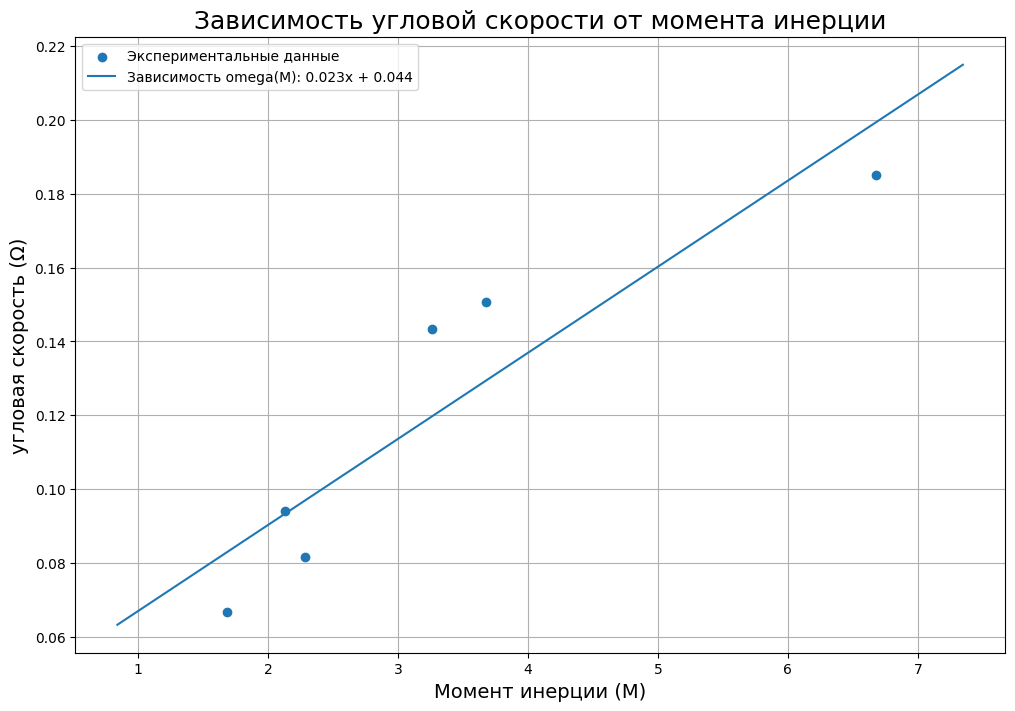

In [26]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))
plt.scatter(momentum_np, omega_np, marker='o', label='Экспериментальные данные')
plt.plot(x_lsq, y_lsq, label=f'Зависимость omega(M): {coefs[0]:.3f}x + {coefs[1]:.3f}')
plt.grid(True)
plt.xlabel('Момент инерции (M)', fontsize=14)
plt.ylabel('угловая скорость (Ω)', fontsize=14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)
plt.legend()
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [27]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10

In [28]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

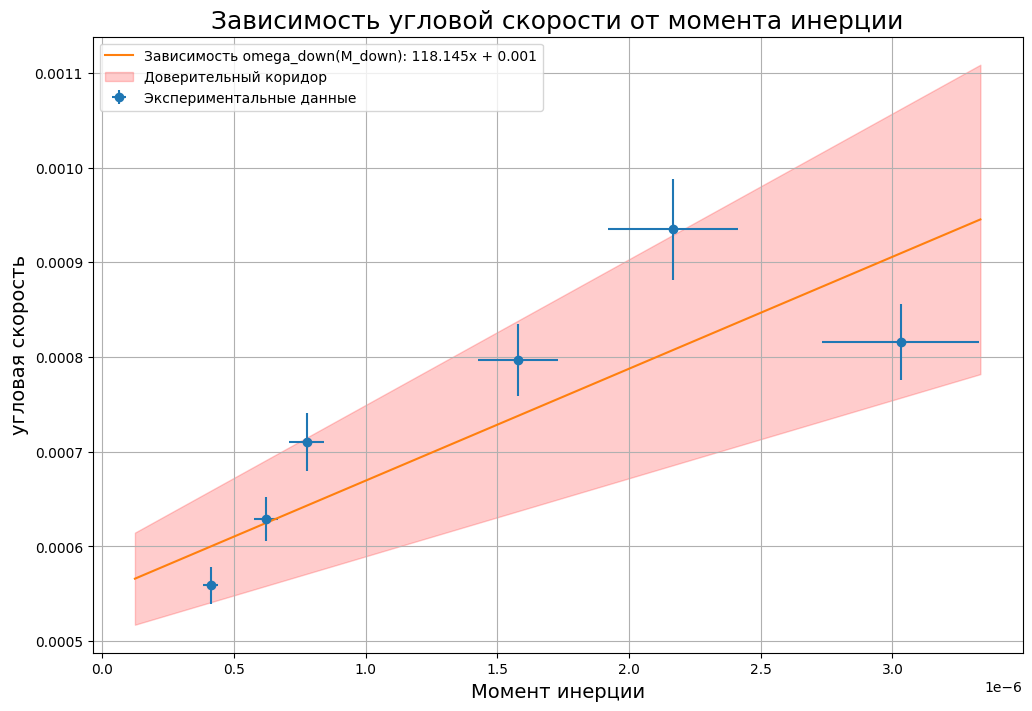

In [31]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)
sigma_down_np = np.array(grouped_data['sigma_down'])
weights = 1 / sigma_down_np

coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, w=weights, cov=True)

# Чтобы прямая построилась снова красиво
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

lsq_stds = np.sqrt(np.diag(cov))

y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval(coefs - lsq_stds, x_lsq)
y_lsq_upper = np.polyval(coefs + lsq_stds, x_lsq) 

fig = plt.figure(figsize=(12, 8))

plt.errorbar(momentum_down_np, omega_down_np, 
            xerr=grouped_data['sigma_momentum'], yerr=sigma_down_np,
            fmt='o', label='Экспериментальные данные')

plt.plot(x_lsq, y_lsq, label=f'Зависимость omega_down(M_down): {coefs[0]:.3f}x + {coefs[1]:.3f}')

plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='red', alpha=0.2, 
                label='Доверительный коридор')

plt.grid(True)
plt.xlabel('Момент инерции', fontsize=14)
plt.ylabel('угловая скорость', fontsize=14)
plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)
plt.legend()
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [32]:
sns.set_style("darkgrid")

In [33]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
iris = iris.drop(columns=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [36]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

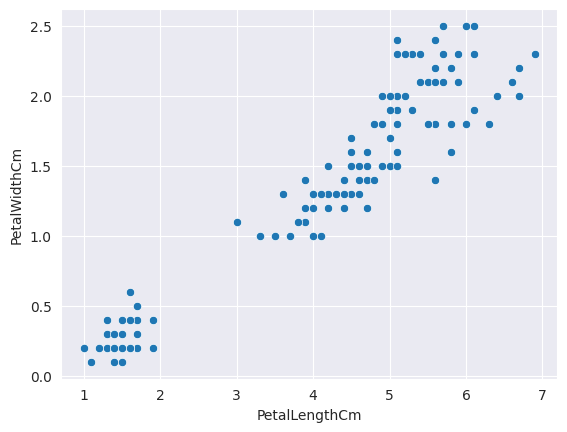

In [42]:
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm')

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>Из графика можно уследить, что с ростом длины лепестка растет и ширина лепестка. Для информативности графику не хватает разделения точек на виды ириса, для того чтобы понять, где на графике расположены экземпляры каждого вида</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

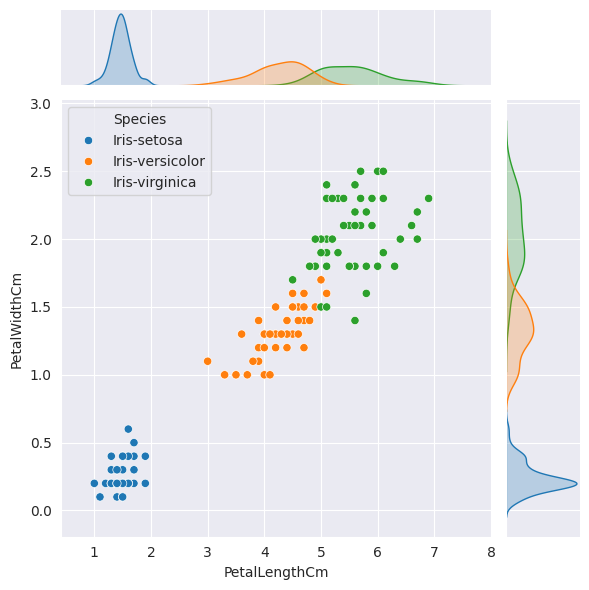

In [43]:
sns.jointplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

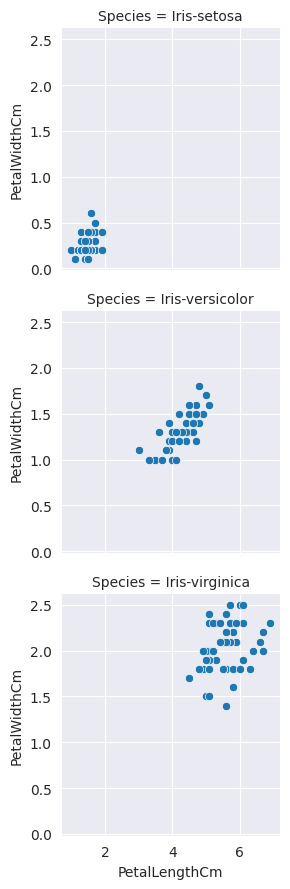

In [54]:
g = sns.FacetGrid(data=iris, row='Species')
g.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm")

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> Из графиков видно, что самый короткий и узкий лепесток у сетозы, самый большой у вирджиники, а у версиколора - где-то посередине. Мне кажется, что в этой задаче jointplot показывает больше всего информации, так как он собирает и нужную нам информацию о виде объектов, так и показывает это все на одной картинке, что позволяет нам сделать четкие выводы</font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

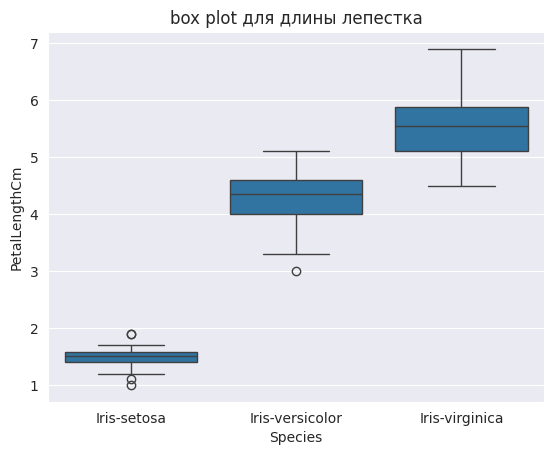

In [51]:
sns.boxplot(data=iris, x='Species', y='PetalLengthCm')
plt.title('box plot для длины лепестка')
plt.show()

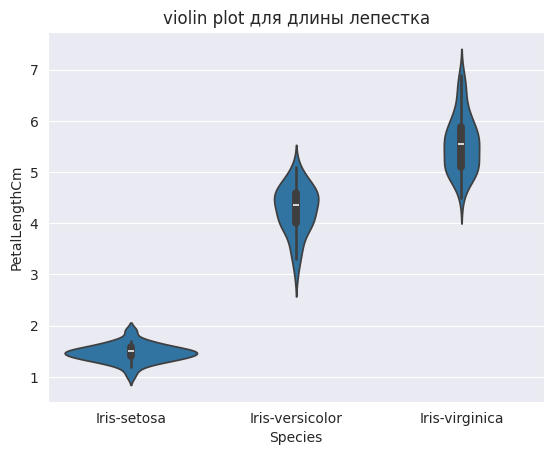

In [49]:
sns.violinplot(data=iris, x='Species', y='PetalLengthCm')
plt.title('violin plot для длины лепестка')
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> В violin plot также содержится информация о распределении данных внутри класса, в box plot же тоже содержится информация об этом самом распределении, но лишь о квантилях, поэтому первый информативней. Однако боксплот легче восприминимать, но вайолин красивее. </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

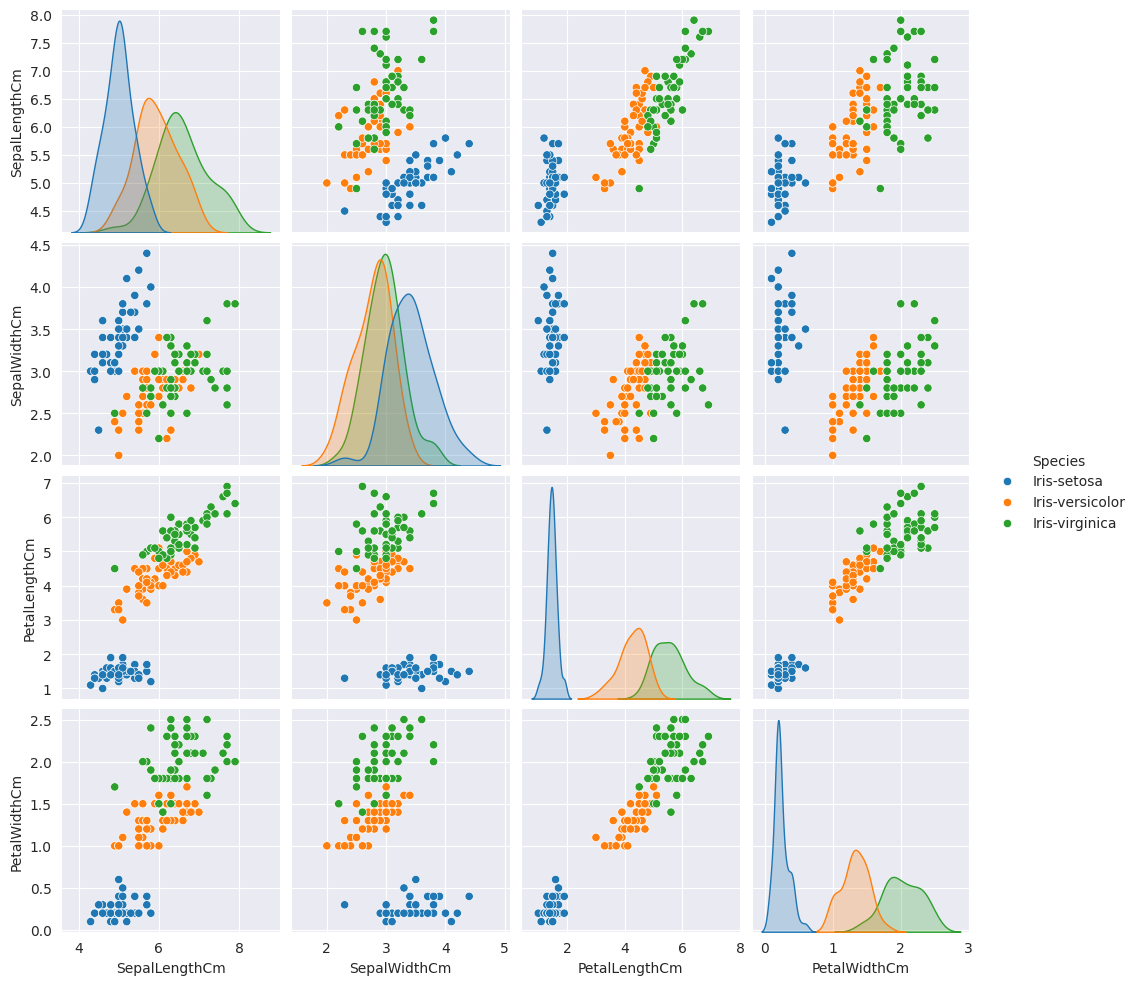

In [52]:
sns.pairplot(data=iris, hue='Species')

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> Из графиков мы можем посмотреть как соотносятся те или иные пары признаков и например понять по каким признакам отличаются сами виды. Например видно, что выбранная нами пара признаков ширина, длина лепестка отлично подходит для разделения объектов на классы, а например взять пару длина и ширина чашелистика не дало бы нам четкого разделения. </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> На главной диагонали стоят графики плотности распределения соответствующего признака по классам </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

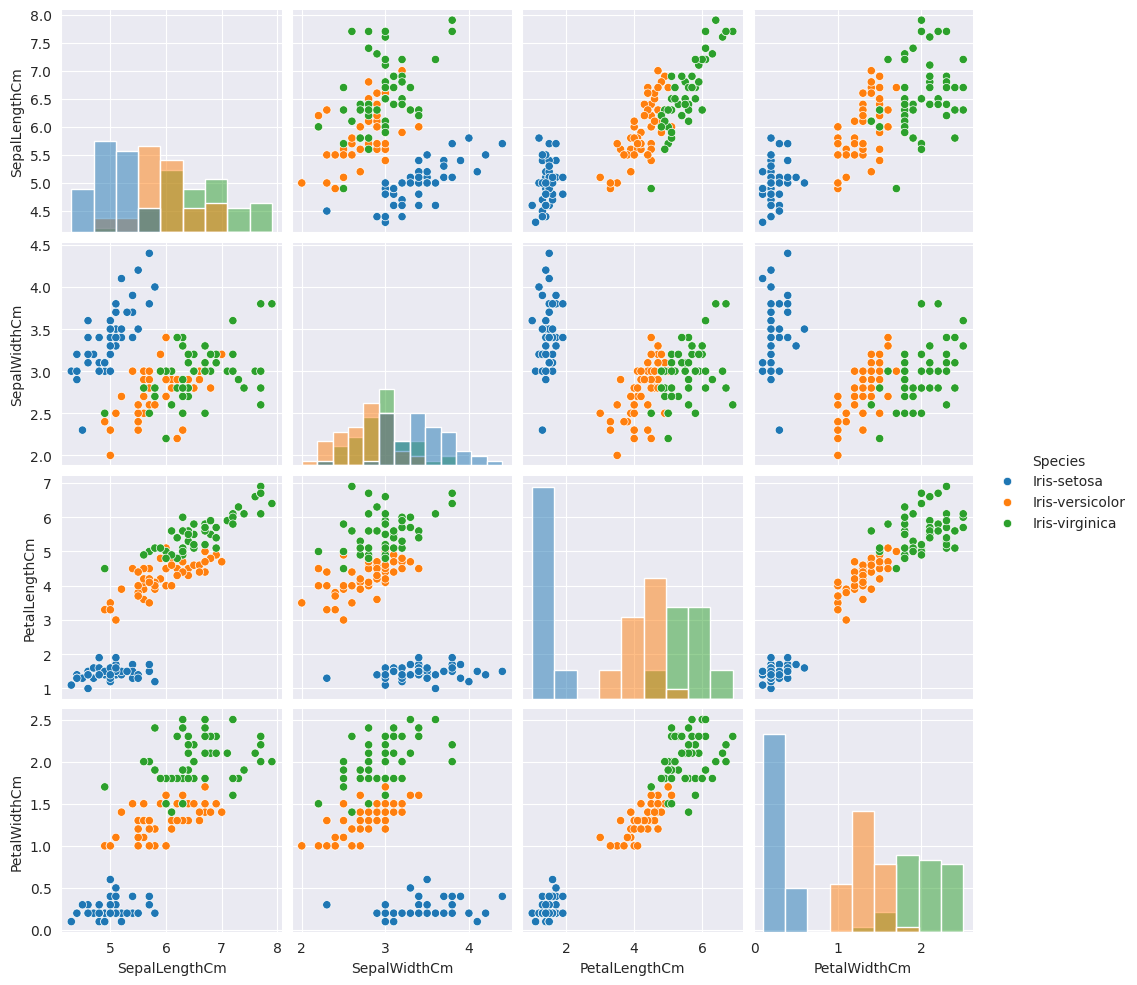

In [55]:
sns.pairplot(data=iris, hue='Species', diag_kind='hist')

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> Теперь на главной диагонали стоят графики гистограмм распределения соответствующих признаков. Я считаю, что получилось чуть менеее информативно, так как смотреть на сглаженную картинку приятнее и понятнее. </font>